# **Module 4: Topic Modeling**

#### 1. **Semantic Text Similarity**

##### **(1) Basic concepts**
- Grouping similar words into semantic concepts
- As a building block in natural language understanding tasks
    - Textual entailment
    - Paraphrasing
    
##### **(2) Application tool: WordNet**
- **What is WordNet**: Semantic dictionary of English words interlinked by semantic relations
- **What does WordNet include**: rich linguistic information
    - Part of speech
    - Word senses
    - Synonyms
    - Hypernyms/hyponyms
    - Meronyms
    - Derivationally related forms
- **Features**
    - Machine-readable, freely available
    - Organizes information in a hierarchy
    - Verbs, nouns, adjectives have separate hierarchies
*<p align='center'>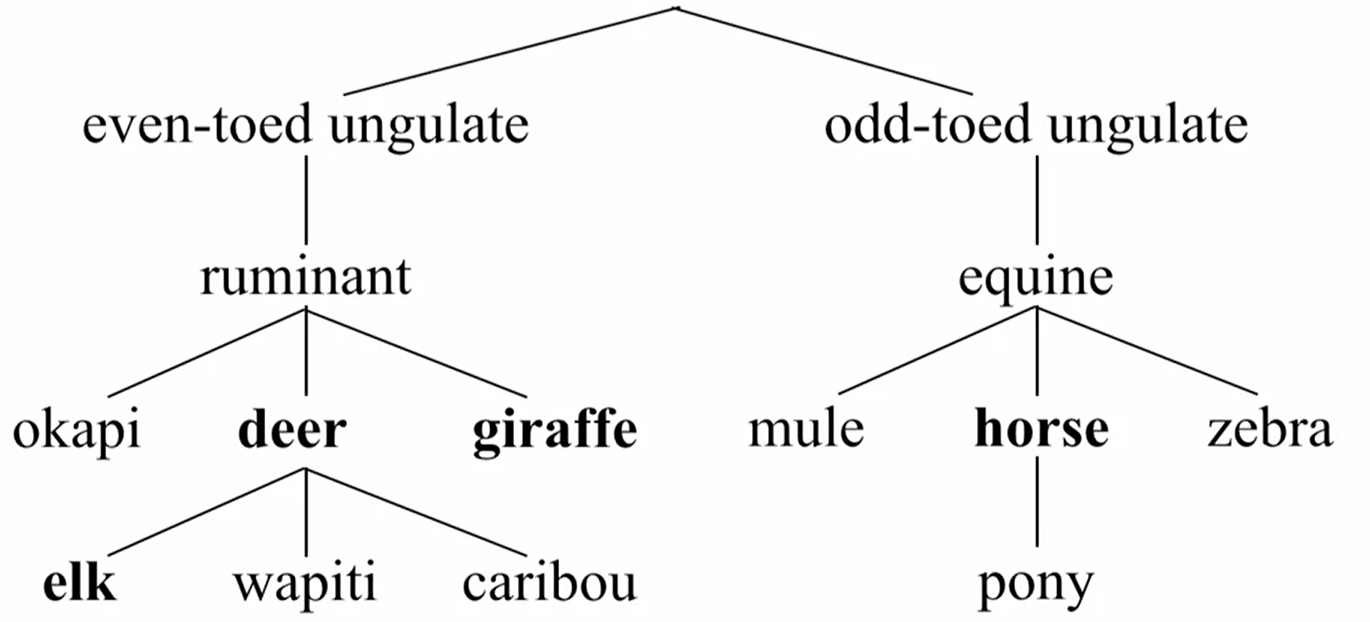</p>*
*<p align='center' style='color:grey'>An example of hierarchy in WordNet</p>*

##### **(3) Indicators of text similarity**
- **Path similarity**
    - **Definition**: an *inverse* relationship with the path distance (shortest path between two concepts in the hierarchy)
    - **Examples**
        - PathSim(deer, elk) = 1/2 = 0.5
        - PathSim(deer, giraffe) = 1/3 = 0.33
        - PathSim(deer, horse) = 1/7 = 0.14
- **Lin similarity**
    - **Definition**: similarity based on the information contained in the Lowest common subsumer (LCS; the closest ancestor to both concepts) of the two concepts
    - **Equation**: $\mathrm{LinSum}(u,v) =\frac{2\times \log P(LCS(u,v))}{\log P(u) + \log P(v)}$, $p$ is given by the information content learnt over a large corpus
- **Distributional similarity**
    - **Principle**: two words that frequently appears in similar contexts are more likely to be semantically related
    - **Examples**
        - The friends <u>met at a</u> *caf&#233;*.
        - Shyam <u>met</u> Ray <u>at a</u> *pizzeria*.
        - Let's <u>meet</u> up <u>near the</u> *coffee shop*.
        - The secret <u>meeting at the</u> *restaurant* soon became public.
    - **Context**
        - Words *before*, *after*, or *within* a small window
        - POS of words *before*, *after*, or *within* a small window
        - Specific syntactic relation to the target word
        - Words in the same sentence or document ...
    - **How to justify association strength**
        - The frequency that they occur together
        - The frequency of individual words
        - Pointwise mutual information: $PMI(w,c) = \log(\frac{P(w,c)}{P(w)P(c)})$

##### **(4) Application in Python**
- WordNet can be imported using NLTK
```Python
import nltk
from nltk.corpus import wordnet as wn
```
- Find appropriate sense of the words
```Python
deer = wn.synset('deer.n.01')
elk = wn.synset('elk.n.01')
```
- Find path similarity
```Python
deer.path_similarity(elk)
```
- Use an information criteria to find Lin similarity
```Python
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')
deer.lin_similarity(elk, brown_ic)
deer.lin_similarity(horse, brown_ic)
```

- Use NLTK Collocations and Association measures
```Python
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text)
finder.nbest(bigram_measures.pmi, 10)
```

- Use a frequency filter
```Python
finder.apply_freq_filter(10)
```


#### ***\*Take Home Concepts 1***

$\qquad$ - Finding similarity between words and text is non-trivial   
$\qquad$ - <u>WordNet</u> is a useful resource for semantic relationships between words  
$\qquad$ - <u>NLTK</u> is a useful package for many tasks to find similarity based on numerous functions

#### 2. **Topic Modeling**

##### **(1) Topic modeling**
- **Definition**
    - A coarse-level analysis of what is in a text collection
- **Features**
    - *Topic*(the theme of a discourse) are represented as a word distribution
    - A document is likely a mixture of different topics
    - Essentially a *clustering* problem
        - Documents and words are clustered simultaneously
    
- **Parameters**
    - ***Known***
        - the text collection/corpus
        - Number of topics
    - ***Unknown**
        - Actual topics
        - Topic distribution for each document

- **Approaches**
    - Probabilistic latent semantic analysis (PLSA) [Hoffman, '99]
    - Latent Dirichlet Allocation (LDA) [Blei, Ng, and Jordan, '03] (**Most popular**)

- **Advantages**
    - Great tool for exploratory text analysis of what the documents are about
    - Many tools are available in Python

- **Disadvantages**
    - Deciding the number of topics is hard
    - Making sense of label generation is subjective

##### **(2) Generative models for text**
- Single-document case:
    - **Generation**: produce a box of words from a model on one document to generate a file
    - **Inference/Estimation**: generate a list of probabilities of each word in the original document
    *<p align='center'>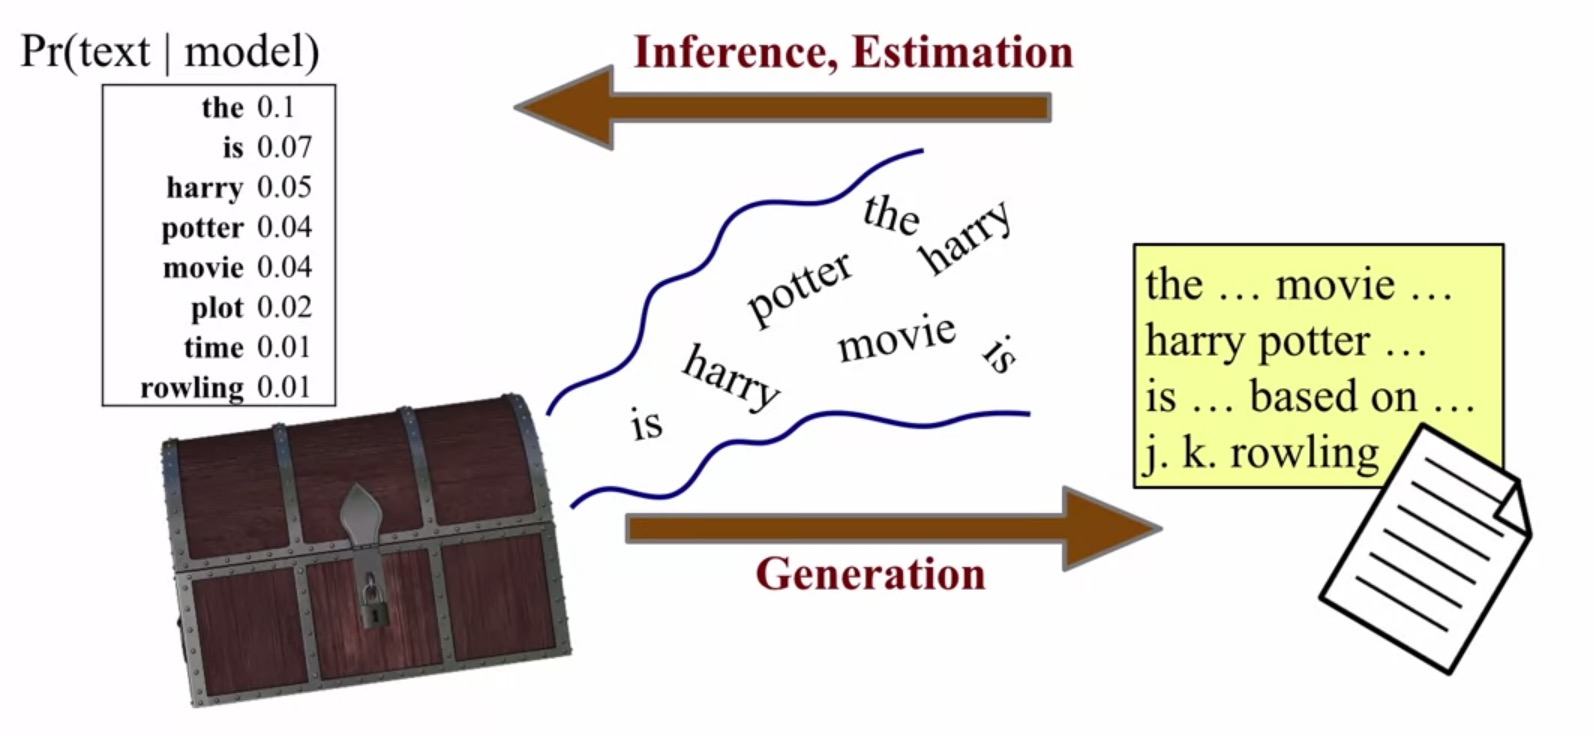</p>*
    *<p align='center' style='color:grey'>An example of a generative model</p>*
- Multiple-documents case:
    - **Generation**: produce a box of words from a model on multiple documents to generate a file
    - **Inference/Estimation**: generate a list of probabilities of each word in each original document, and combine them to a *mixture model*
    *<p align='center'>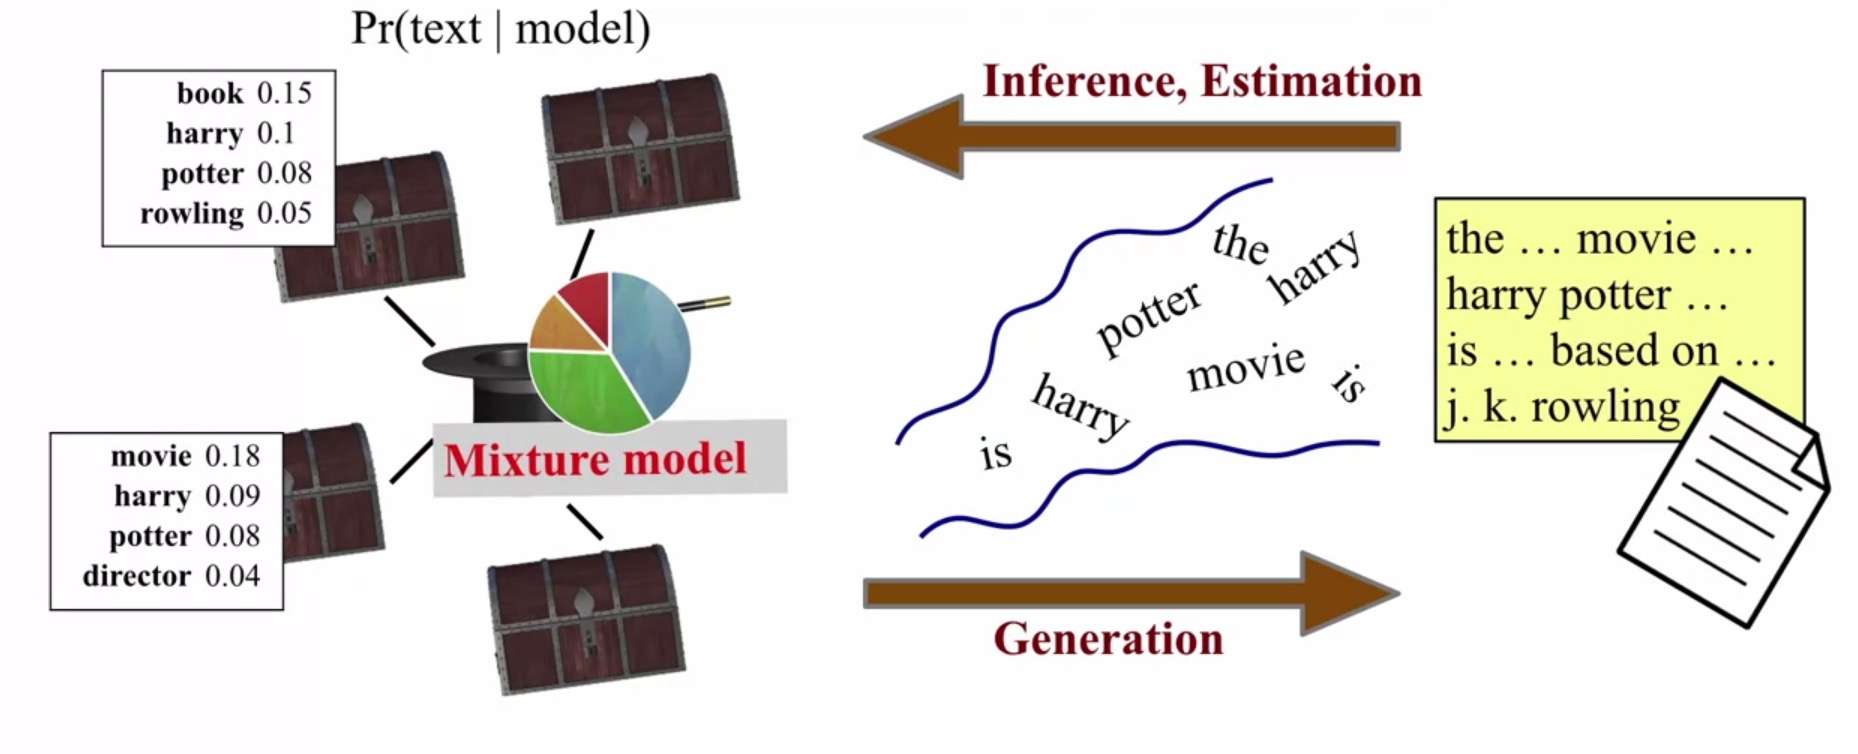</p>*
    *<p align='center' style='color:grey'>An example of a generative model with a mixture model</p>*

##### **(3) Latent Dirichlet Allocation (LDA)**
- **Basic principle**
    - Choose length of document *d*
    - Choose a mixture of topics for document *d*
    - Use a topic's multinomial distribution to output words to that topic's quota
- **How to use LDA in Python**
    - **Packages**: gensim, lda
    - **Preprocessing text**
        - Tokenize, normalize (lower-case)
        - Stop word removal
        - Stemming
        - Convert tokenized documents to a document-term matrix
    - **Use Gensim to learn text documents**
    ```python
    doc_set # set of pre-processed text documents
    import gensim
    from gensim import corpora, models
    
    dictionary = corpora.Dictionary(doc_set) # Create a dictionary to map between IDs and words
    corpus = [dictionary.doc2bow(doc) for doc in doc_set] # Create a corpus by going through all docs in the doc set and create a document to bag of words model (document-term matrix)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 4, id2word = dictionary, passes = 50) # Create an LDA model with specified number of topics and ID to word mapping and how many passes to go through
    print(ldamodel.print_topics(num_topics = 4, num_words =5)) # Print topics learnt from the LDA model
    ```
    - **Find topic distribution of documents**

#### ***\*Take Home Concepts 2***

$\qquad$ - <u>Topic modeling</u> is an exploratory tool for text mining    
$\qquad$ - <u>Latent Dirichlet Allocation</u> is a generative model for modeling large text corpora  
$\qquad$ - <u>Latent Dirichlet Allocation (LDA)</u> can be used as a feature selection technique for text classification and other tasks

#### 3. **Information Extraction**

##### **(1) Basic concepts**
- **Rationale**
    - Most information is stored in unstructured freeform text
    - It is essential to get interesting data from free text
- **Goal**: *identify* and *extract* fields of interest from free text

##### **(2) Named entity recognition**
- **What is *named entity***: noun phrases that are of specific type and refer to specific individuals/places/organizations,...
- **Definition**: techniques to identify all mentions of pre-defined named entities in text
- **Examples**
    - Identify the mention/phrase: *boundary detection*
    - Identify the type: *tagging/classification*
    *<p align='center'>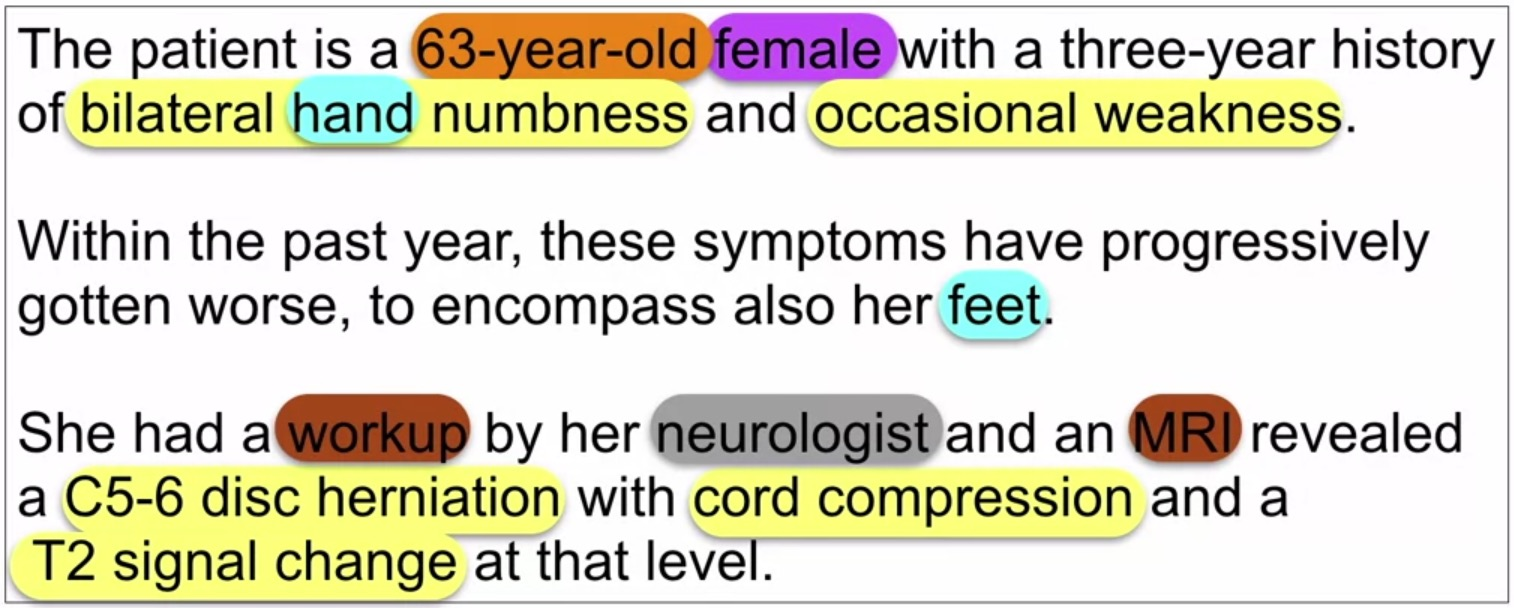</p>*
    *<p align='center' style='color:grey'>An example of named entity recognition tasks</p>*
- **Approaches**
    - For well-formatted fields (e.g., date, phone numbers): regular expressions
    - For other fields: a machine learning approach
        - Separation model: person (PER), organization (ORG), location (LOC/GPE), other (any other class)

##### **(3) Relation extraction**
- **Task**: identify relationships between named entities
- **Example**: 
*<p align='center'>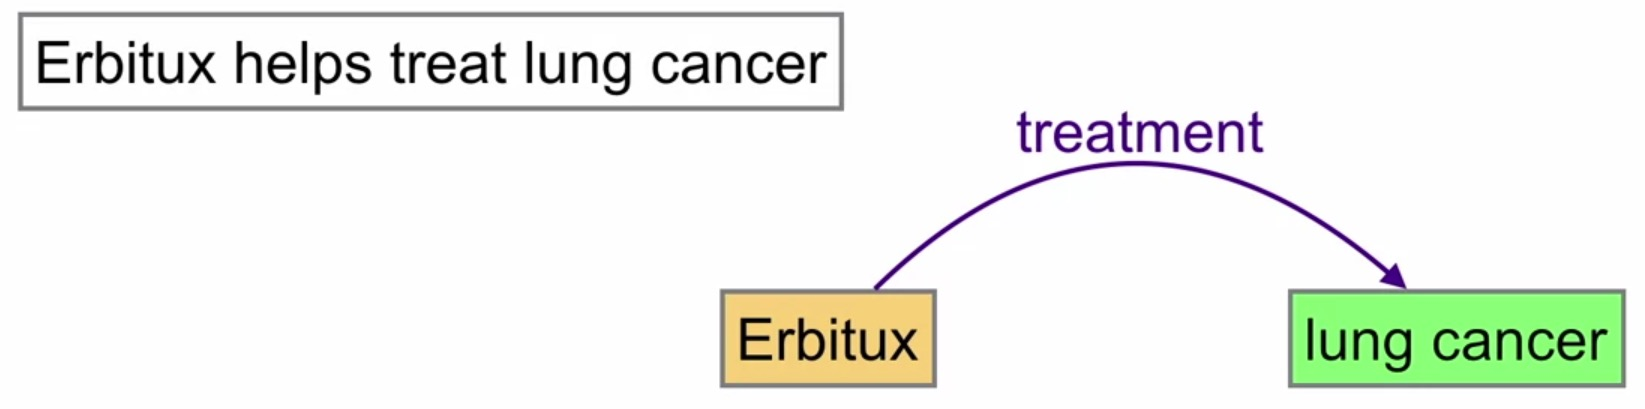</p>*
*<p align='center' style='color:grey'>An example of relation extraction</p>*

##### **(4) Co-reference resolution**
- **Task**: disambiguate mentions and group mentions together
- **Example**:
*<p align='center'>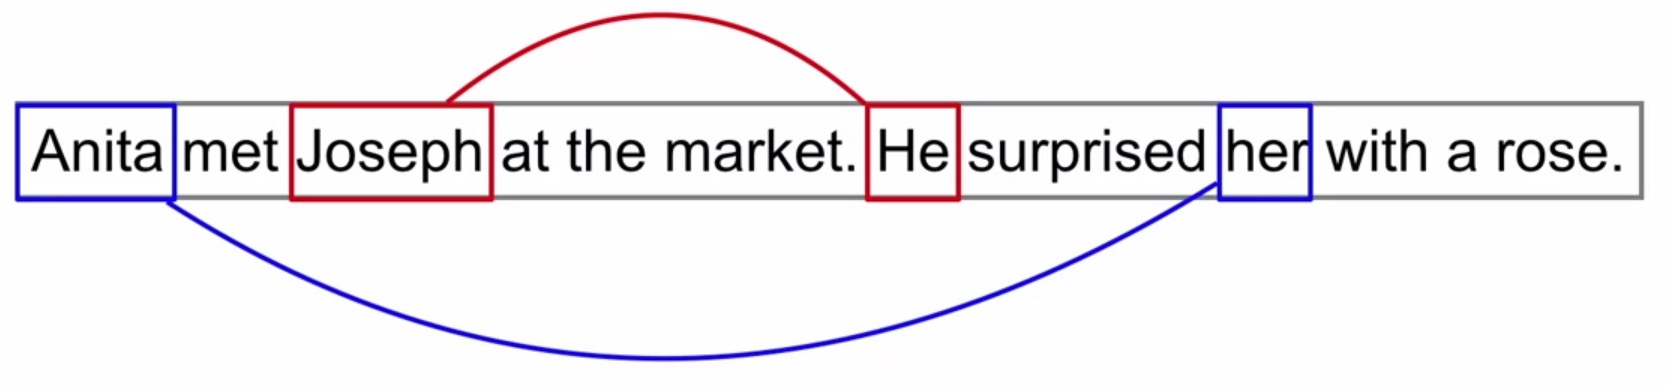</p>*
*<p align='center' style='color:grey'>An example of co-reference resolution</p>*

##### **(5) Question answering**
- **Task**: find the most appropriate answer from the text to answer the given question
- **Example**:
    - Q: What does Erbitux treat?
        - A: Erbitux is a treatment -> treat lung cancer (from the text)
    - Q: Who gave Anita the rose?
        - A: Joseph (after co-reference resolution)

#### ***\*Take Home Concepts 3***

$\qquad$ - <u>Information extraction/u> is important for natural language understanding and making sense of textual data     
$\qquad$ - <u>Named entity recognition</u> is a key building block to address many advanced NLP tasks  
$\qquad$ - <u>Named entity recognition systems</u> deploy supervised machine learning and text mining techniques to solve NLP problems